Importamos las librerias necesarias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization styles
sns.set(style="whitegrid")


Cargamos el dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Lee el dataset desde Google Drive
df=pd.read_csv("/content/drive/MyDrive/Proyecto Capstone/Impact_of_Remote_Work_on_Mental_Health.csv")

#Muestra las primeras filas
df.head(10)


,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
5,EMP0006,59,Non-binary,Sales,IT,31,Hybrid,39,3,4,High,NaN,No,Increase,5,Unsatisfied,1,NaN,Average,South America
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
7,EMP0008,42,Non-binary,Data Scientist,Manufacturing,6,Onsite,54,7,3,Medium,Depression,No,Decrease,5,Satisfied,4,NaN,Average,North America
8,EMP0009,56,Prefer not to say,Data Scientist,Healthcare,9,Hybrid,24,4,2,High,NaN,Yes,Decrease,2,Unsatisfied,4,Daily,Poor,Europe
9,EMP0010,30,Female,HR,IT,28,Hybrid,57,6,1,Low,Depression,Yes,Decrease,2,Neutral,1,Weekly,Poor,North America


Vision General de los Datos

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

Revisamos si hay datos faltantes

In [ ]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


,0
Mental_Health_Condition,1196
Physical_Activity,1629


Resumen Estadistico

In [ ]:
df.describe()


,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.995000,17.810200,39.614600,7.559000,2.984200,2.993800,3.007800
std,11.296021,10.020412,11.860194,4.636121,1.410513,1.394615,1.399046
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,40.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


Distribucion de Edad

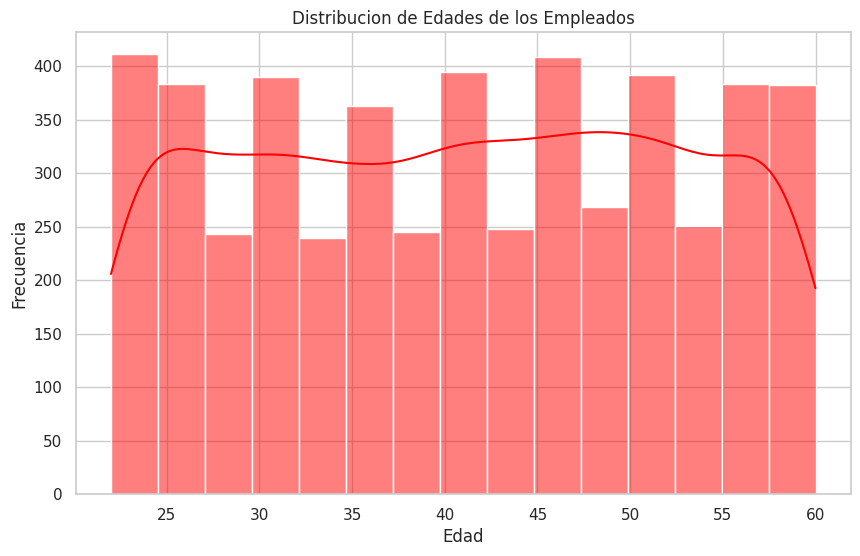

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=15, kde=True, color='red')
plt.title('Distribucion de Edades de los Empleados')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


Distribucion de Genero

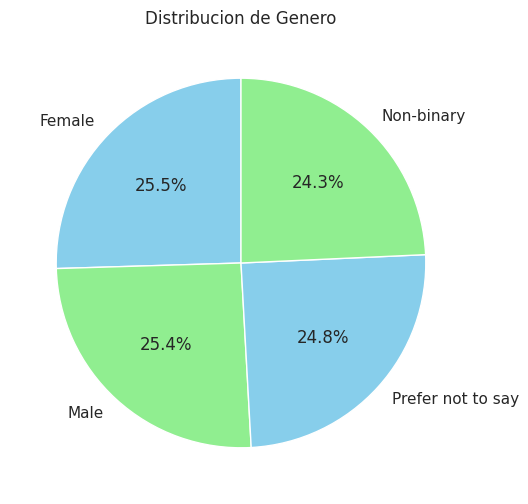

In [ ]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Distribucion de Genero')
plt.show()


Analisis de los Roles

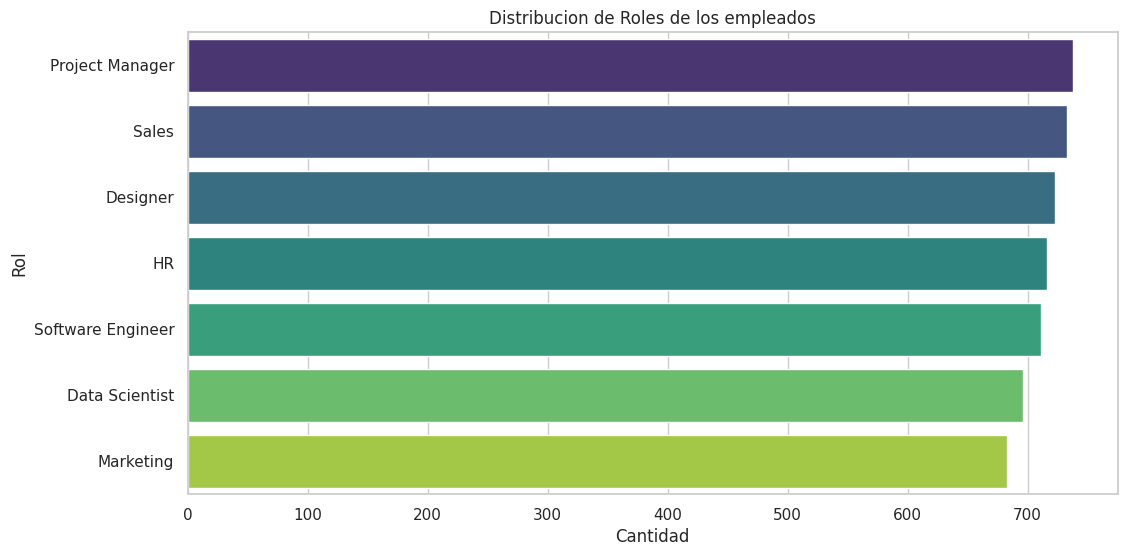

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Job_Role', order=df['Job_Role'].value_counts().index, palette='viridis')
plt.title('Distribucion de Roles de los empleados')
plt.xlabel('Cantidad')
plt.ylabel('Rol')
plt.show()


Distribucion de Industrias a las que pertenecen los trabajadores

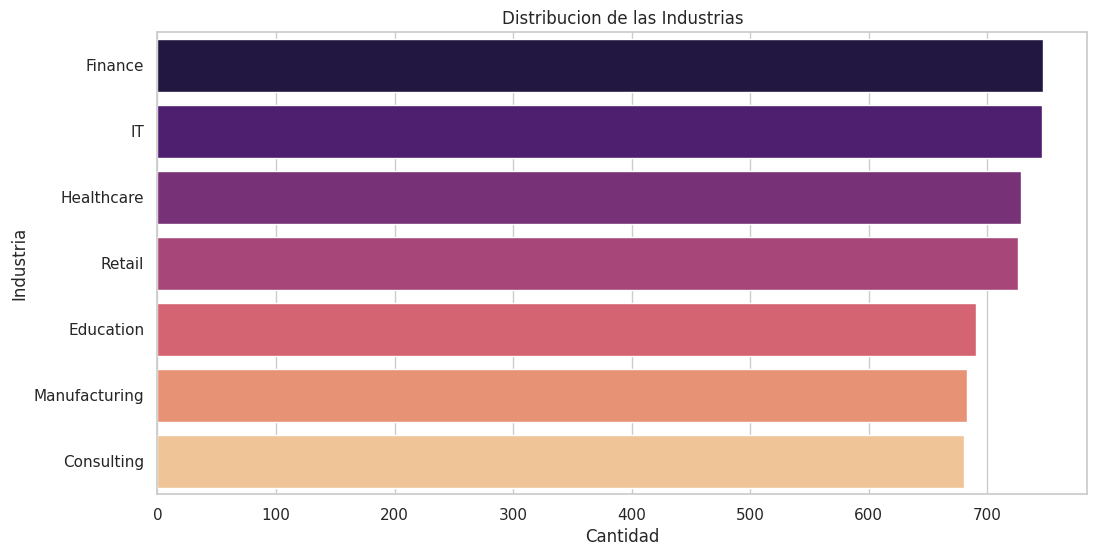

In [ ]:
# Industry distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Industry', order=df['Industry'].value_counts().index, palette='magma')
plt.title('Distribucion de las Industrias')
plt.xlabel('Cantidad')
plt.ylabel('Industria')
plt.show()


Nivel de Experiencia vs. Satisfaccion con Trabajo Remoto

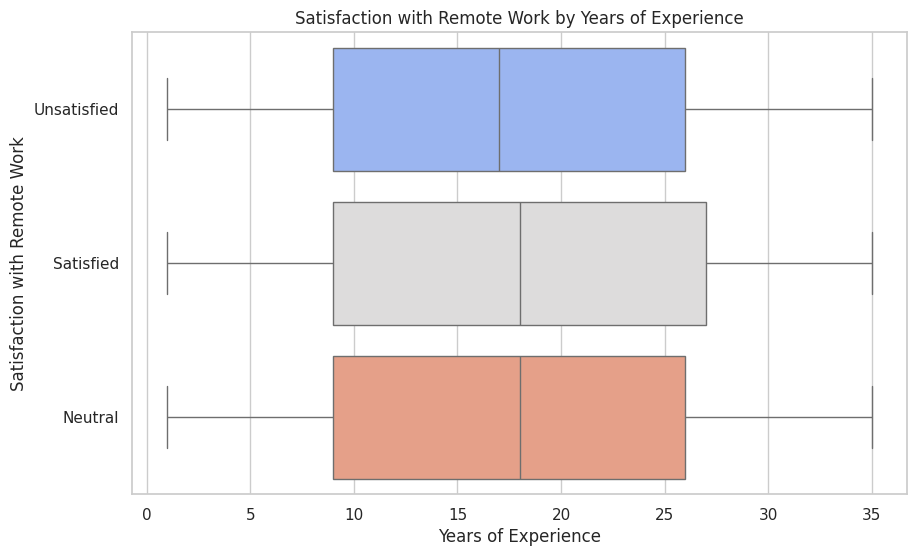

In [ ]:
# Boxplot for Years of Experience vs. Satisfaction with Remote Work
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Years_of_Experience', y='Satisfaction_with_Remote_Work', palette='coolwarm')
plt.title('Satisfaction with Remote Work by Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Satisfaction with Remote Work')
plt.show()


Modalidad de Trabajo vs. Cambio en la Productividad

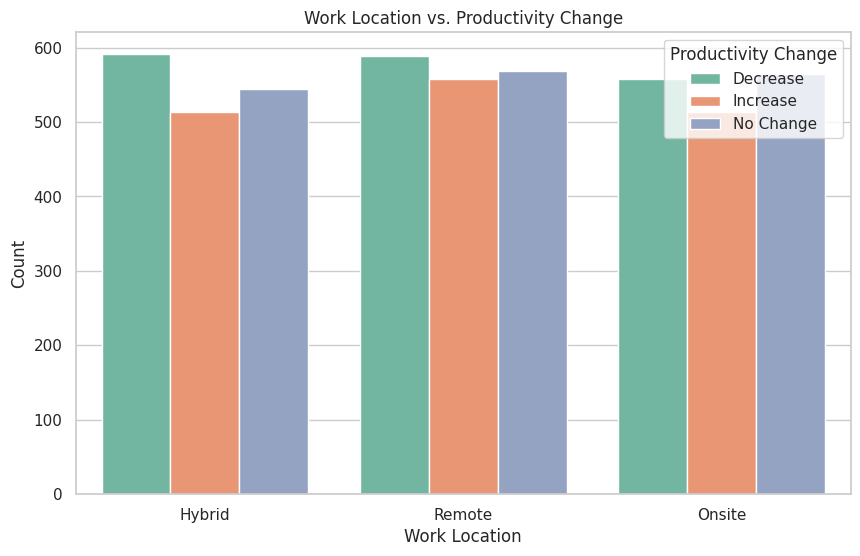

In [ ]:
# Bar plot for Work Location vs. Productivity Change
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Work_Location', hue='Productivity_Change', palette='Set2')
plt.title('Work Location vs. Productivity Change')
plt.xlabel('Work Location')
plt.ylabel('Count')
plt.legend(title='Productivity Change')
plt.show()


Evaluación del Equilibrio Entre Vida Laboral y Personal

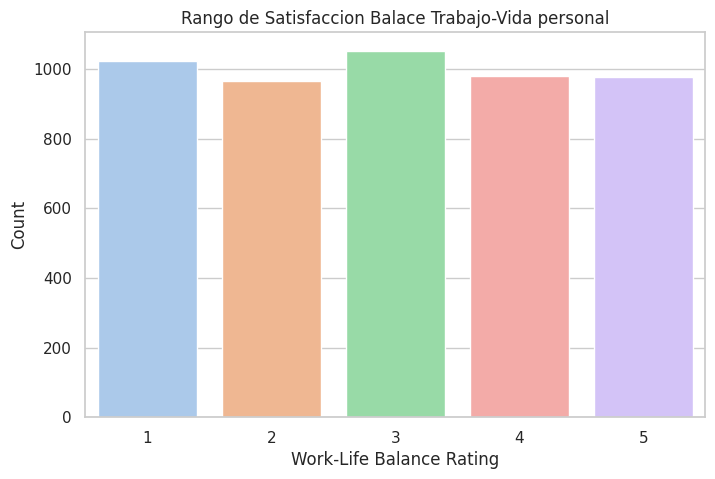

In [ ]:
# Countplot for Work-Life Balance Rating
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Work_Life_Balance_Rating', palette='pastel')
plt.title('Rango de Satisfaccion Balace Trabajo-Vida personal')
plt.xlabel('Work-Life Balance Rating')
plt.ylabel('Count')
plt.show()


Análisis de Condiciones de Salud Mental

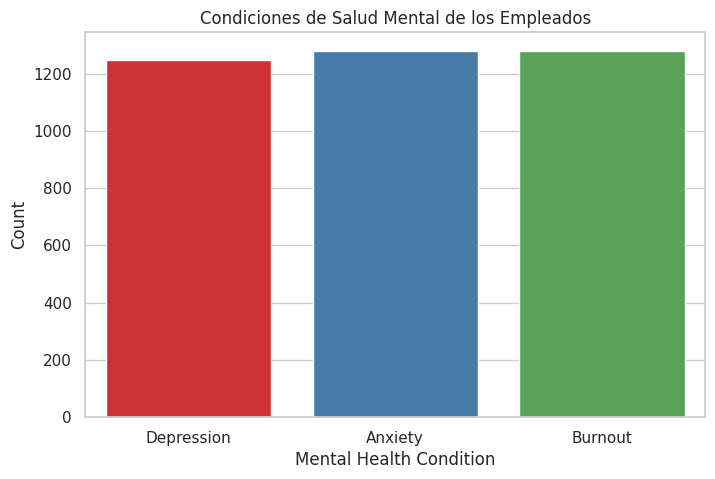

In [ ]:
# Countplot for Mental Health Condition
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Mental_Health_Condition', palette='Set1')
plt.title('Condiciones de Salud Mental de los Empleados')
plt.xlabel('Mental Health Condition')
plt.ylabel('Count')
plt.show()


Acceso a Recursos de Salud Mental

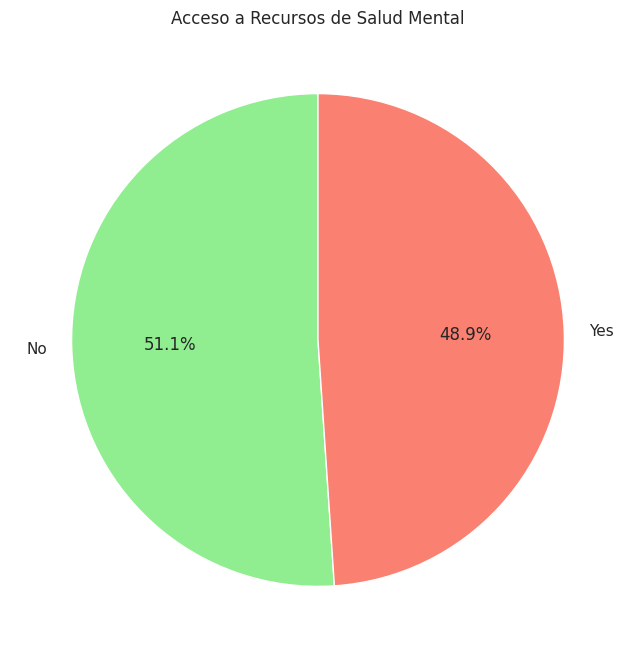

In [ ]:
# Pie chart for Access to Mental Health Resources
plt.figure(figsize=(8, 8))
df['Access_to_Mental_Health_Resources'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'])
plt.title('Acceso a Recursos de Salud Mental')
plt.ylabel('')
plt.show()


Impacto de las Reuniones Virtuales

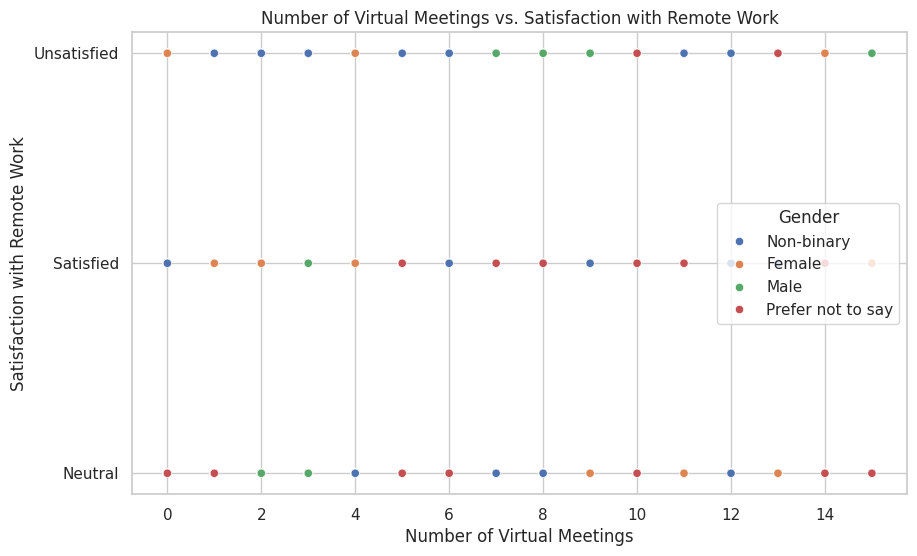

In [ ]:
# Scatter plot for Number of Virtual Meetings vs. Satisfaction with Remote Work
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Number_of_Virtual_Meetings', y='Satisfaction_with_Remote_Work', hue='Gender', palette='deep')
plt.title('Number of Virtual Meetings vs. Satisfaction with Remote Work')
plt.xlabel('Number of Virtual Meetings')
plt.ylabel('Satisfaction with Remote Work')
plt.show()


Actividad física y satisfacción con trabajo remoto

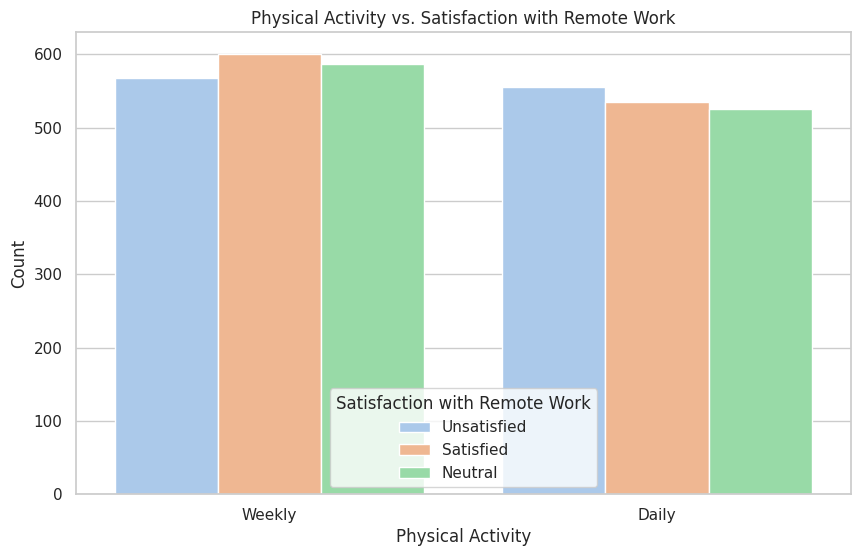

In [ ]:
# Bar plot for Physical Activity vs. Satisfaction with Remote Work
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Physical_Activity', hue='Satisfaction_with_Remote_Work', palette='pastel')
plt.title('Physical Activity vs. Satisfaction with Remote Work')
plt.xlabel('Physical Activity')
plt.ylabel('Count')
plt.legend(title='Satisfaction with Remote Work')
plt.show()


Matriz de correlación

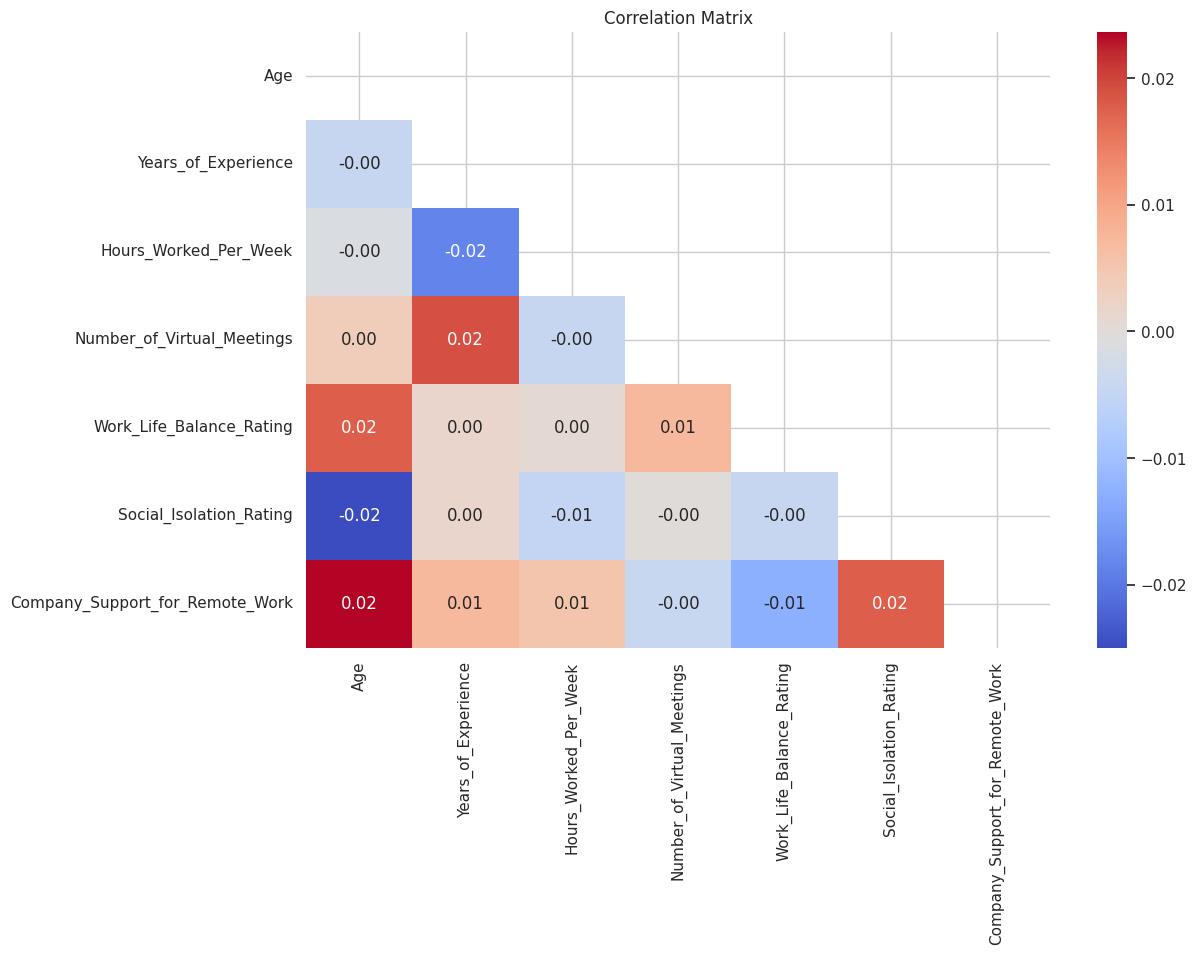

In [ ]:
# Correlation matrix heatmap with only numeric columns
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=np.triu(correlation_matrix))
plt.title('Correlation Matrix')
plt.show()
